In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()

In [ ]:
X = housing.data[:506,:]
Y = housing.target[:506]

In [ ]:
Y.shape,X.shape

((506,), (506, 8))

In [ ]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
df = pd.DataFrame(X)
df.columns = housing.feature_names

In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [ ]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.249016,44.620553,4.983345,1.065455,958.474308,2.699433,37.813340,-122.233083
std,1.824978,9.081277,1.231427,0.101084,562.796057,0.882802,0.044913,0.044415
min,0.499900,2.000000,1.714286,0.571429,18.000000,1.437141,37.730000,-122.340000
25%,2.010050,40.000000,4.209722,1.011368,576.750000,2.222549,37.780000,-122.270000
50%,2.698400,48.000000,4.797753,1.060227,860.000000,2.551841,37.810000,-122.240000
75%,3.906300,52.000000,5.697566,1.104497,1172.500000,3.003665,37.850000,-122.190000
max,11.601700,52.000000,8.972868,1.753333,4985.000000,12.234043,37.900000,-122.120000


In [ ]:
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
X = (X-u)/std

In [ ]:
one = np.ones((X.shape[0],1))

In [ ]:
X = np.hstack((one,X))

In [ ]:
X.shape

(506, 9)

In [ ]:
print(pd.DataFrame(X).head())

     0         1         2         3         4         5         6         7  \
0  1.0  2.784256 -0.399078  1.626376 -0.412393 -1.132034 -0.163139  1.485687   
1  1.0  2.771202 -2.603591  1.019983 -0.926624  2.565678 -0.668524  1.039937   
2  1.0  2.198574  0.813404  2.686365  0.079139 -0.822557  0.116594  0.817062   
3  1.0  1.313140  0.813404  0.677939  0.075307 -0.712284 -0.171768  0.817062   
4  1.0  0.327552  0.813404  1.055518  0.154743 -0.699834 -0.587310  0.817062   

          8  
0  0.069483  
1  0.294857  
2 -0.155891  
3 -0.381265  
4 -0.381265  


In [ ]:
# X - Matrix having shape mxn
# x - Vector having n features

def hypothesis(x,theta):
  y_ = 0
  n = x.shape[0]
  for i in range(n):
    y_ += theta[i]*x[i]
  return y_

def error(X,y,theta):
  error = 0
  m = X.shape[0]
  for i in range(m):
    y_ = hypothesis(X[i],theta)
    error += (y_-y[i])**2
  return error/m

def gradient(X,y,theta):
  grad = np.zeros((X.shape[1]))
  m = X.shape[0]
  n = X.shape[1]
  for j in range(n):
    for i in range(m):
      y_ = hypothesis(X[i],theta)
      grad[j] += (y_-y[i])*X[i][j]
  return grad/m

def gradient_descent(X,y,lr=0.1,max_epoch = 300):
  m = X.shape[0]
  n = X.shape[1]
  theta = np.zeros((n))
  error_list = []
  theta_list = []
  for i in range (max_epoch):
    grad = gradient(X,y,theta)
    err = error(X,y,theta)
    error_list.append(err)
    for j in range(n):
      theta[j] = theta[j]-lr*grad[j]
  return theta,error_list


In [ ]:
import time
start = time.time()
theta,error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken: ",end-start)

Time taken:  6.99414587020874


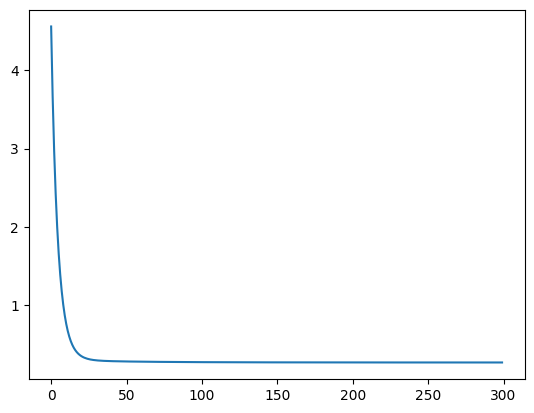

In [ ]:
plt.plot(error_list)

In [ ]:
def r2_score(y,y_):
  num = np.sum((y-y_)**2)
  denom = np.sum((y-y.mean())**2)
  score = (1-num/denom)
  return score*100

In [ ]:
y_ = []
m,n = X.shape
for i in range(m):
  y_pred = hypothesis(X[i],theta)
  y_.append(y_pred)
y_ = np.array(y_)

In [ ]:
y_.shape

(506,)

In [ ]:
print(r2_score(Y,y_))

72.31488626429515


In [150]:
def hypothesis(X,theta):
  return np.dot(X,theta)

def error(X,y,theta):
  e = 0.0
  y_ = hypothesis(X,theta)
  m = X.shape[0]
  e = np.sum((y_-y)**2)
  return e/m

def gradient(X,y,theta):
  y_ = hypothesis(X,theta)
  grad = np.dot(X.T,(y_-y))
  m = X.shape[0]
  return grad/m

def gradient_descent(X,y,lr = 0.1,max_iters = 300):
  n = X.shape[1]
  theta = np.zeros((n,))
  error_list = []
  for i in range(max_iters):
    grad = gradient(X,y,theta)
    e = error(X,y,theta)
    error_list.append(e)
    theta = theta - lr*grad
  return theta,error_list

In [151]:
import time
start = time.time()
theta,error_list = gradient_descent(X,Y)
end = time.time()
print("Time taken: ",end-start)

Time taken:  0.008204221725463867


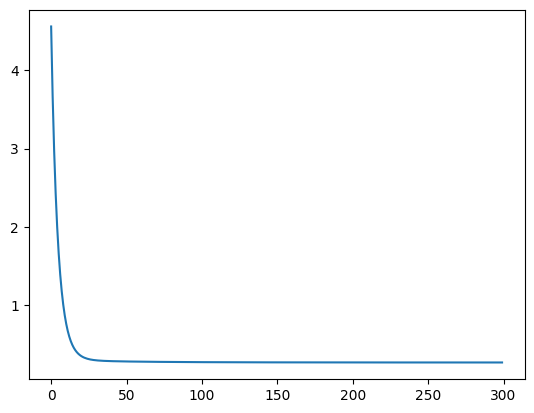

In [152]:
plt.plot(error_list)

In [153]:
y_ = []
m,n = X.shape
for i in range(m):
  y_pred = hypothesis(X[i],theta)
  y_.append(y_pred)
y_ = np.array(y_)

In [154]:
print(r2_score(Y,y_))

72.31488626429515


In [149]:
y_.shape

(506,)

In [ ]:
theta

array([ 1.89709296,  0.54427519, -0.03299989, -0.03490582, -0.04648697,
        0.08879427, -0.01006054,  0.60158879,  0.24751406])

In [159]:
# prompt: write a code for sklearn linear regression model taking X and y

from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, Y)

# Make predictions
y_pred_sklearn = model.predict(X)

# Evaluate the model
print("Sklearn R2 score:", r2_score(Y, y_pred_sklearn))
print("Sklearn coefficients:", model.coef_)
print("Sklearn intercept:", model.intercept_)
print(model.score(X,Y))

Sklearn R2 score: 72.32496206876624
Sklearn coefficients: [ 0.          0.53686157 -0.03331642 -0.03815567 -0.04317328  0.08648789
 -0.00852753  0.62474203  0.26994491]
Sklearn intercept: 1.8970929644269248
0.7232496206876624
